In [78]:
import keras
import tensorflow
import os
from keras.layers import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from keras.layers import BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.utils import shuffle
from cv2 import imread
import numpy as np
import pandas as pd

In [79]:
labels=list()
path='Garbage Dataset Fix'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
labels

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [80]:
data = []
labels = []
width,height=150,150

imagePaths = list(paths.list_images('Garbage Dataset Fix'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    #print(imagePath)
    image = load_img(imagePath, target_size=(width, height))
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
#labels = to_categorical(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(2550, 150, 150, 3)
(2550, 6)


In [81]:
test_ratio = 0.20

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=test_ratio)

print("Train images:",x_train.shape)
print("Test images:",x_test.shape)
print("Train label:",y_train.shape)
print("Test label:",y_test.shape)

Train images: (2040, 150, 150, 3)
Test images: (510, 150, 150, 3)
Train label: (2040, 6)
Test label: (510, 6)


In [82]:
from keras.models import Model
from keras.layers import Input 
from keras.applications.vgg16 import VGG16
from keras import layers

INIT_LR = 1e-4
EPOCHS = 64
BS = 32

vgg = VGG16(weights= "imagenet", include_top=False, input_shape= (150,150,3)) 

model = Sequential()
model.add(vgg)
model.add(layers.Flatten())
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(6, activation = 'softmax'))

opt = Adam(learning_rate=INIT_LR)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               819300    
                                                                 
 dense_11 (Dense)            (None, 6)                 606       
                                                                 
Total params: 15,534,594
Trainable params: 15,534,594
Non-trainable params: 0
_________________________________________________________________


In [83]:
# train the head of the network
print("[INFO] training head..")
h = model.fit(x_train,y_train, batch_size = 32, epochs= 64, validation_split = 0.2)
print("Done !!")

[INFO] training head..
Epoch 1/64
51/51 [==============================] - 20s 321ms/step - loss: 1.8940 - accuracy: 0.4632 - val_loss: 1.0738 - val_accuracy: 0.5539
Epoch 2/64
51/51 [==============================] - 15s 286ms/step - loss: 0.8189 - accuracy: 0.6838 - val_loss: 0.7254 - val_accuracy: 0.7157
Epoch 3/64
51/51 [==============================] - 14s 285ms/step - loss: 0.5992 - accuracy: 0.7653 - val_loss: 0.6333 - val_accuracy: 0.7696
Epoch 4/64
51/51 [==============================] - 14s 283ms/step - loss: 0.4815 - accuracy: 0.8248 - val_loss: 0.6139 - val_accuracy: 0.7525
Epoch 5/64
51/51 [==============================] - 15s 288ms/step - loss: 0.3743 - accuracy: 0.8640 - val_loss: 0.5291 - val_accuracy: 0.8088
Epoch 6/64
51/51 [==============================] - 15s 286ms/step - loss: 0.2149 - accuracy: 0.9222 - val_loss: 0.6163 - val_accuracy: 0.8015
Epoch 7/64
51/51 [==============================] - 15s 288ms/step - loss: 0.3557 - accuracy: 0.8799 - val_loss: 0.6151

In [84]:
#!pip install scikit-plot
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
#import scikitplot as skplt
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics

print("[INFO] evaluating network...")
predIdxs = model.predict(x_test, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)

trainpredIdxs = model.predict(x_train, batch_size=BS)
trainpredIdxs = np.argmax(trainpredIdxs, axis=1)

trainScore=accuracy_score(trainpredIdxs,y_train.argmax(axis=1))*100
Score=accuracy_score(predIdxs,y_test.argmax(axis=1))*100

print("\nTraining Accuracy Score:-",trainScore)
print("\nTesting Accuracy Score:-",Score)

[INFO] evaluating network...

Training Accuracy Score:- 97.25490196078431

Testing Accuracy Score:- 84.90196078431373


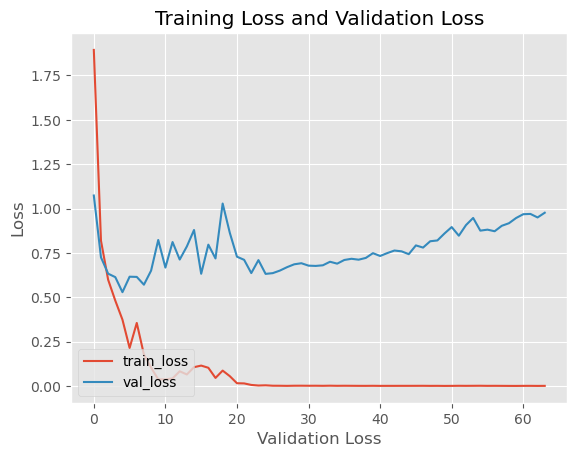

In [85]:
# plot the training loss and validation loss
N = 64
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), h.history["val_loss"], label="val_loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Validation Loss")
plt.ylabel("Loss")
plt.legend(loc="lower left",)
plt.show()

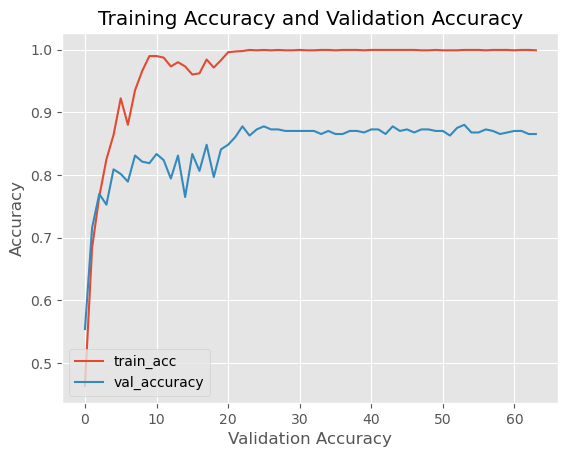

In [86]:
# plot the training accuracy and validation accuracy
N = 64
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), h.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), h.history["val_accuracy"], label="val_accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Validation Accuracy")
plt.ylabel("Accuracy")
plt.legend(loc="lower left",)
plt.show()

In [87]:
ypred = model.predict(x_test)
#accuracy_score(np.argmax( ypred,  axis = 1),y_test)

In [88]:
ypred = np.argmax(ypred, axis = 1)

In [89]:
y_test.shape

(510, 6)

In [90]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(y_pred)

[2 3 3 5 1 0 3 4 1 1 1 5 0 4 0 2 2 4 2 3 1 3 0 3 2 1 4 1 2 4 0 4 1 1 5 3 2
 0 1 4 3 2 3 4 3 5 0 1 4 0 2 4 3 3 5 0 5 2 0 2 1 0 2 4 3 5 1 2 1 1 2 3 0 1
 2 5 4 4 3 5 4 3 0 4 0 5 2 5 5 2 2 5 1 1 5 5 5 5 3 1 3 5 2 3 1 2 4 5 4 3 1
 5 4 4 2 5 1 1 3 1 3 4 0 5 5 4 0 3 3 2 3 5 3 1 3 1 0 0 3 0 4 3 5 2 3 0 3 3
 3 5 3 1 3 4 2 3 4 5 5 3 0 1 5 4 2 3 0 2 2 0 1 3 2 4 0 5 5 3 4 3 0 4 2 3 0
 0 0 1 0 4 2 5 5 1 2 2 2 3 2 2 1 5 0 3 4 5 3 5 5 3 0 4 2 4 4 1 3 0 2 3 4 0
 4 0 5 5 4 1 0 5 1 0 1 5 4 1 3 0 2 0 1 1 4 1 3 2 3 4 4 5 1 2 2 5 5 1 4 0 0
 0 4 0 1 1 2 3 2 0 1 1 4 0 2 0 0 0 2 2 4 5 1 4 1 5 1 5 5 4 3 5 0 3 4 1 5 5
 5 1 2 2 4 3 3 0 3 1 5 3 1 5 3 0 4 4 3 3 2 0 3 4 4 1 0 1 2 1 1 5 2 5 4 3 4
 2 0 5 0 0 3 2 4 3 1 3 2 0 2 5 5 4 0 5 2 3 5 4 5 2 0 4 2 5 5 4 2 1 0 2 2 0
 4 5 5 2 2 4 2 5 0 3 0 0 4 1 2 1 4 1 1 3 1 3 5 3 3 0 5 1 5 5 4 2 3 3 1 4 3
 1 3 3 4 4 2 2 2 2 3 1 5 0 1 2 1 0 0 2 5 1 1 3 1 3 1 3 3 3 2 0 2 2 0 2 4 5
 0 4 1 1 5 5 3 0 1 5 0 0 1 3 4 2 2 1 2 3 2 5 2 3 3 3 5 1 5 3 2 3 5 4 0 4 1
 5 0 3 0 4 4 0 5 0 3 2 1 

In [91]:
#y_test=np.argmax(y_test,axis=1)
print(y_test)

[[0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]


In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(ypred, np.argmax (y_test, axis = 1))
cm = confusion_matrix(ypred, np.argmax (y_test, axis = 1))

In [93]:
acc

0.8490196078431372

In [94]:
x_test.shape

(510, 150, 150, 3)

In [95]:
from sklearn.metrics import classification_report
import numpy as np

# print the report
print(classification_report(y_pred, np.argmax (y_test, axis = 1)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        84
           1       0.82      0.76      0.79        83
           2       0.79      0.82      0.80        87
           3       0.91      0.86      0.89        94
           4       0.74      0.82      0.78        78
           5       1.00      0.94      0.97        84

    accuracy                           0.85       510
   macro avg       0.85      0.85      0.85       510
weighted avg       0.85      0.85      0.85       510



In [96]:
extract = Model(model.inputs, model.layers[-3].output)

#del(data)
#del(labels)
feat_train  = extract.predict(x_train)  
feat_test = extract.predict(x_test)      

print(feat_train.shape)

(2040, 8192)


In [97]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels

array([1, 3, 3, 5, 1, 0, 3, 4, 2, 1, 1, 5, 0, 4, 0, 2, 2, 4, 2, 3, 1, 3,
       0, 3, 2, 1, 4, 4, 2, 4, 0, 4, 2, 1, 5, 3, 2, 0, 4, 4, 4, 2, 1, 4,
       2, 5, 0, 1, 1, 0, 2, 4, 3, 3, 5, 0, 5, 0, 0, 2, 1, 0, 2, 4, 3, 5,
       1, 2, 1, 1, 2, 3, 0, 4, 2, 5, 4, 4, 3, 5, 0, 3, 0, 4, 2, 5, 2, 5,
       5, 4, 2, 5, 1, 1, 5, 5, 5, 5, 3, 1, 3, 5, 2, 3, 1, 2, 4, 5, 1, 3,
       1, 5, 4, 4, 2, 5, 1, 1, 3, 4, 3, 2, 4, 5, 5, 4, 0, 3, 0, 2, 3, 5,
       3, 1, 3, 1, 0, 0, 3, 0, 4, 3, 5, 2, 3, 0, 3, 3, 0, 5, 3, 1, 3, 2,
       4, 3, 4, 0, 5, 3, 0, 1, 5, 4, 4, 3, 0, 2, 2, 0, 1, 3, 2, 2, 0, 5,
       5, 3, 4, 3, 0, 2, 4, 3, 0, 0, 3, 1, 0, 4, 2, 5, 5, 4, 2, 2, 1, 3,
       2, 2, 1, 5, 3, 3, 4, 5, 3, 5, 5, 3, 0, 4, 1, 4, 1, 4, 3, 0, 2, 3,
       4, 0, 4, 0, 5, 5, 4, 4, 0, 5, 2, 0, 4, 5, 0, 4, 3, 0, 2, 0, 1, 1,
       4, 4, 3, 2, 3, 4, 4, 5, 2, 2, 2, 5, 5, 1, 4, 0, 4, 0, 4, 0, 1, 1,
       2, 3, 2, 0, 1, 1, 1, 0, 2, 0, 3, 0, 1, 2, 4, 5, 1, 4, 1, 5, 1, 5,
       5, 4, 3, 5, 0, 3, 2, 1, 0, 2, 5, 4, 2, 2, 1,

In [98]:
feat_train.shape

(2040, 8192)

In [99]:
feat_test.shape

(510, 8192)

Support Vector Machine (SVM)

In [100]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(feat_train,np.argmax(y_train,axis=1))

SVC(kernel='linear')

In [101]:
y_trainpred = svm.predict(feat_train)
#y_testpred = np.argmax(y_testpred, axis = 1)
print(accuracy_score(y_trainpred, np.argmax(y_train, axis = 1)))

0.9990196078431373


In [102]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_testpred = svm.predict(feat_test)
#y_testpred = np.argmax(y_testpred, axis = 1)
print(accuracy_score(y_testpred, np.argmax(y_test, axis = 1)))

0.8333333333333334


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_testpred, np.argmax(y_test, axis = 1)))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        93
           1       0.75      0.67      0.71        86
           2       0.76      0.78      0.77        87
           3       0.89      0.90      0.89        88
           4       0.72      0.85      0.78        74
           5       0.97      0.94      0.96        82

    accuracy                           0.83       510
   macro avg       0.83      0.83      0.83       510
weighted avg       0.84      0.83      0.83       510



In [104]:
y_testpred.shape

(510,)

Confusion Matrix

[[80  0  2  8  1  2]
 [ 0 58 13  0 15  0]
 [ 1 10 68  2  6  0]
 [ 5  2  0 79  2  0]
 [ 0  7  4  0 63  0]
 [ 2  0  3  0  0 77]]


<AxesSubplot:>

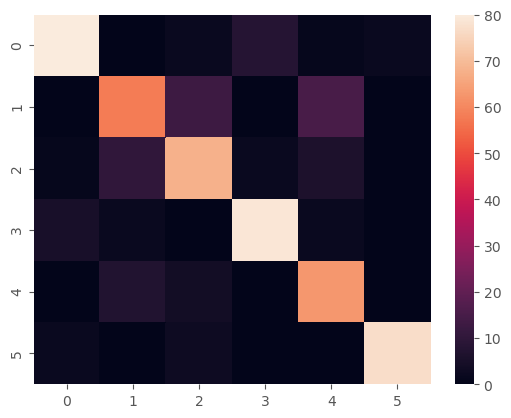

In [105]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
hasilsvm = confusion_matrix(y_testpred, np.argmax(y_test, axis = 1))
print('Confusion Matrix\n')
print(hasilsvm)

import seaborn as sns
sns.heatmap(hasilsvm)

In [106]:
#model.save('vgg-svm-Citra 224*224.h5')